<a href="https://colab.research.google.com/github/nasehacho/data-analytics-projects/blob/master/Challenge_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [58]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [59]:
df.shape

(61214, 5)

In [60]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [61]:
ny_df = df[df['state']=='New York']

In [62]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [63]:
ny_df.shape

(1105, 5)

In [64]:
ny_df.tail()

,date,state,fips,cases,deaths
60968,2023-03-06,New York,36,6785652,79680
61024,2023-03-07,New York,36,6786691,79689
61080,2023-03-08,New York,36,6788050,79701
61136,2023-03-09,New York,36,6789563,79986
61192,2023-03-10,New York,36,6790972,79962


In [65]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [66]:
#total number of cases
ny_df['cases'].max()

6790972

In [67]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

3393077948

Finding new covid 19 cases on daily basis (new cases added everyday)

In [87]:
ny_df['date'] = pd.to_datetime(ny_df['date'])

In [88]:
ny_df = ny_df.sort_values(['state', 'date'])

In [89]:
ny_df['new_cases'] = ny_df['cases'].diff()
ny_df['new_deaths'] = ny_df['deaths'].diff()

In [91]:
ny_df.loc[ny_df.groupby('state').head(1).index, 'new_cases'] = 0
ny_df.loc[ny_df.groupby('state').head(1).index, 'new_deaths'] = 0

In [92]:
print(ny_df[['date', 'state', 'cases', 'new_cases', 'deaths', 'new_deaths']])

            date     state    cases  new_cases  deaths  new_deaths
246   2020-03-01  New York        1        0.0       0         0.0
261   2020-03-02  New York        1        0.0       0         0.0
276   2020-03-03  New York        2        1.0       0         0.0
293   2020-03-04  New York       11        9.0       0         0.0
313   2020-03-05  New York       22       11.0       0         0.0
...          ...       ...      ...        ...     ...         ...
60968 2023-03-06  New York  6785652     2405.0   79680         5.0
61024 2023-03-07  New York  6786691     1039.0   79689         9.0
61080 2023-03-08  New York  6788050     1359.0   79701        12.0
61136 2023-03-09  New York  6789563     1513.0   79986       285.0
61192 2023-03-10  New York  6790972     1409.0   79962       -24.0

[1105 rows x 6 columns]


# **Finding new covid 19 cases in each month**


In [105]:
ny_monthly = ny_df.groupby(ny_df['date'].dt.strftime('%Y-%m')).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

In [106]:
print(ny_monthly)

       date  new_cases  new_deaths
0   2020-03    76210.0      1929.0
1   2020-04   233485.0     21687.0
2   2020-05    65879.0      6083.0
3   2020-06    22567.0      2077.0
4   2020-07    21581.0       596.0
5   2020-08    19757.0       169.0
6   2020-09    23889.0       216.0
7   2020-10    48854.0       395.0
8   2020-11   140525.0       998.0
9   2020-12   326292.0      3407.0
10  2021-01   441124.0      5621.0
11  2021-02   223960.0      3965.0
12  2021-03   227471.0      2647.0
13  2021-04   174727.0      1938.0
14  2021-05    54311.0      1030.0
15  2021-06    12514.0       337.0
16  2021-07    35298.0       171.0
17  2021-08   127783.0       581.0
18  2021-09   148307.0      1086.0
19  2021-10   133395.0      1062.0
20  2021-11   170682.0      1054.0
21  2021-12   745358.0      1944.0
22  2022-01  1315562.0      5254.0
23  2022-02   118963.0      2494.0
24  2022-03    70380.0       572.0
25  2022-04   171318.0       371.0
26  2022-05   278081.0       643.0
27  2022-06   168595

In [108]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths,year_month
246,2020-03-01,New York,36,1,0,0.0,0.0,2020-03
261,2020-03-02,New York,36,1,0,0.0,0.0,2020-03
276,2020-03-03,New York,36,2,0,1.0,0.0,2020-03
293,2020-03-04,New York,36,11,0,9.0,0.0,2020-03
313,2020-03-05,New York,36,22,0,11.0,0.0,2020-03
338,2020-03-06,New York,36,44,0,22.0,0.0,2020-03
369,2020-03-07,New York,36,89,0,45.0,0.0,2020-03
404,2020-03-08,New York,36,106,0,17.0,0.0,2020-03
440,2020-03-09,New York,36,142,0,36.0,0.0,2020-03
478,2020-03-10,New York,36,173,0,31.0,0.0,2020-03


In [98]:
ny_df['new_cases'].sum()

6790971.0

In [100]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [101]:
type(ny_new_cases)

pandas.core.series.Series

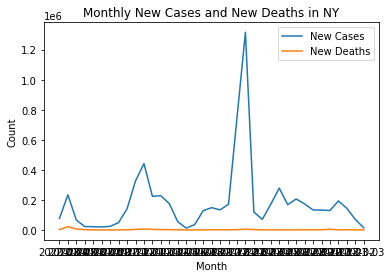

In [107]:
plt.plot(ny_monthly['date'], ny_monthly['new_cases'], label='New Cases')
plt.plot(ny_monthly['date'], ny_monthly['new_deaths'], label='New Deaths')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly New Cases and New Deaths in NY')
plt.legend()
plt.show()

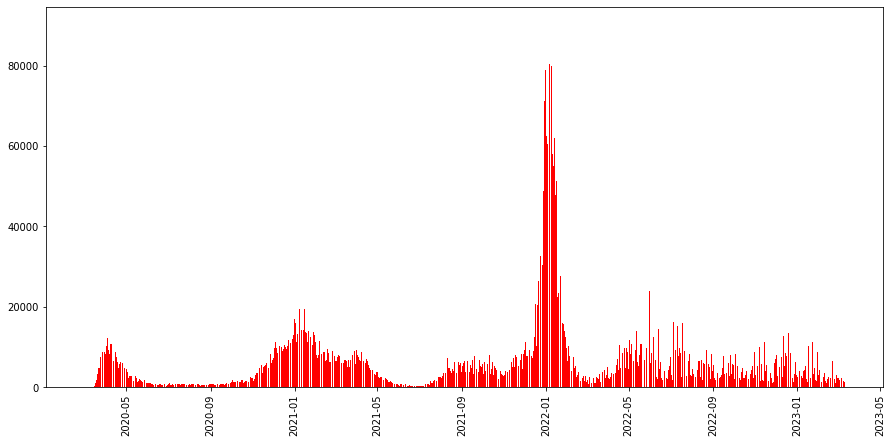

In [111]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# **Finding which month was the deadliest for New York** 

In [116]:
#deadliest month in New York 
deadliest_month = ny_df.groupby(ny_df['date'].dt.strftime('%Y-%m')).agg({
    'new_deaths': 'sum'
}).sort_values('new_deaths', ascending=False).index[0]

In [117]:
print(f"The deadliest month for New York was {deadliest_month}.")

The deadliest month for New York was 2020-04.


# Task4: Understand NY covid 19 data in last 30 days

In [23]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [24]:
# ny_dates_30

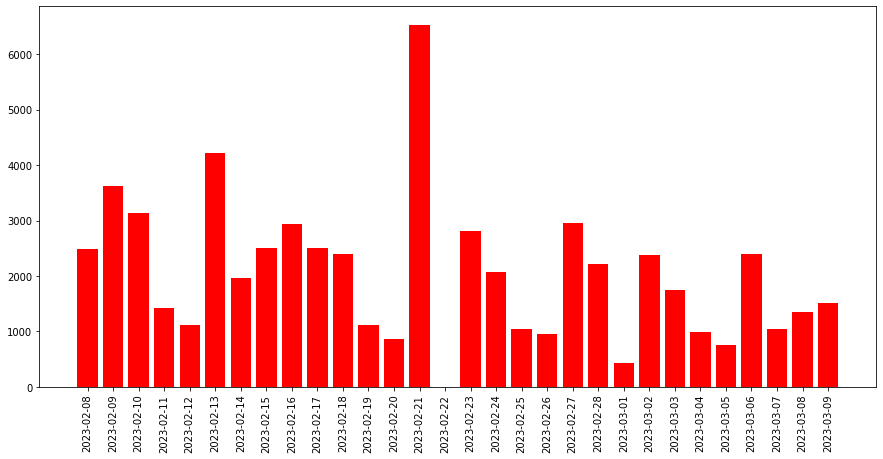

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

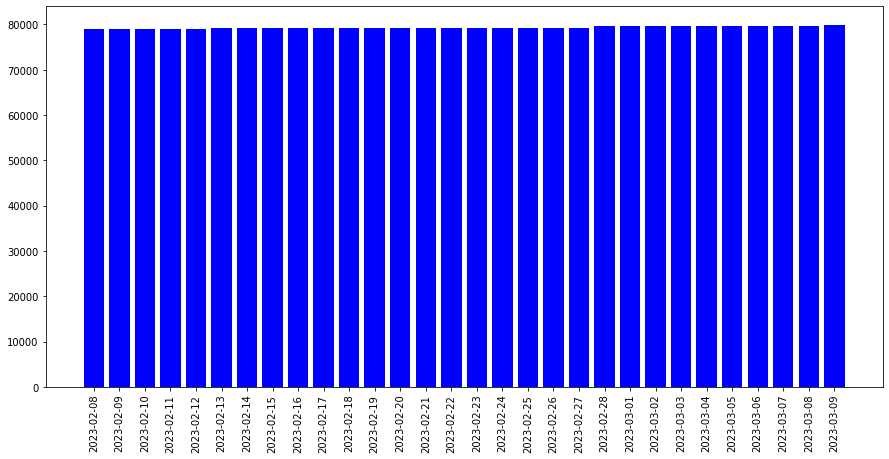

In [121]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [27]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

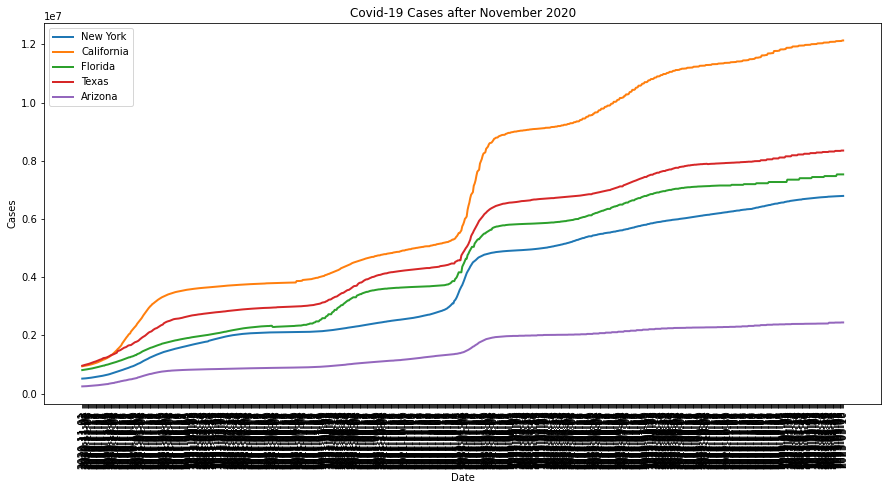

In [120]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Covid-19 Cases after November 2020')
plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:


1.   Conclusion 1
- The number of new cases and deaths per month in New York state had increased over time since 2020. However it can be seen that there has been a decrease in both in most recent months. 

2.   Conclusion 2
- The month that was most deadly in New York had been April of the year 2020 with over 20,000 deaths.

3. Conclusion 3

- In comparison to other states in the U.S., New York has had less cases in states such as California, Florida, and Texas but has more cases than Arizona following November 2020. 

4. Conclusion 4

- It can be seen that there is a U shape in recovery in New York where cases begin to increase once again after a period of plateau. This showcases that the virus is stil a formidable condition that should be taken earnestly. 

